In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
# Map M to 1 and B to 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
y = df.diagnosis
removed = ['Unnamed: 32','id','diagnosis']
x = df.drop(removed,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Malignant:  357
Number of Benign:  212


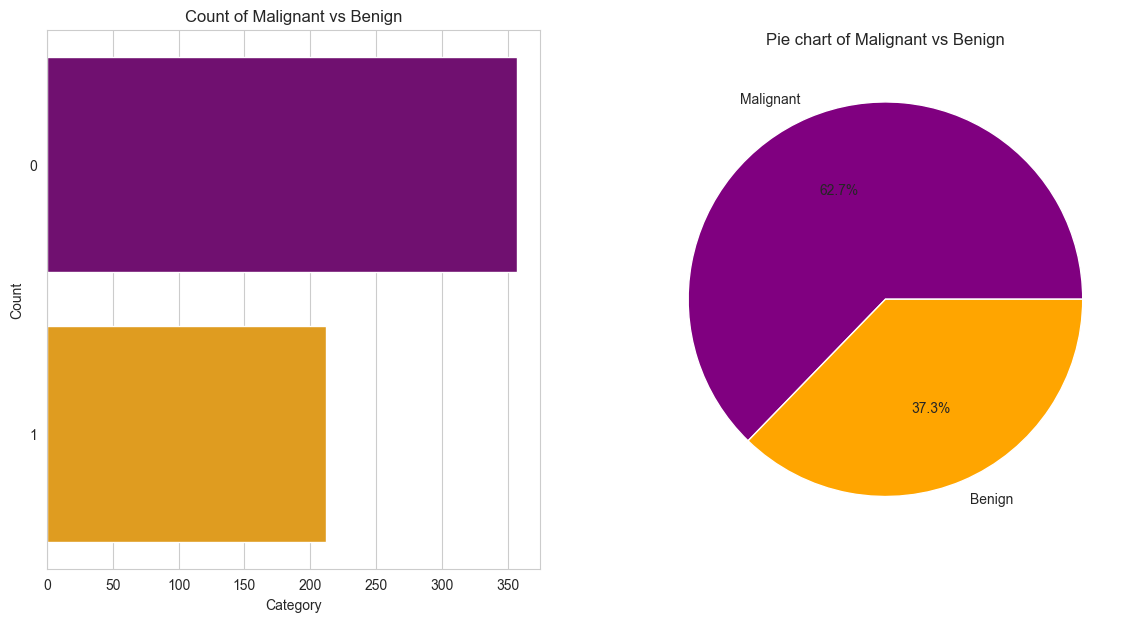

In [6]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.countplot(y=y, hue=y, ax=ax[0], palette=['purple', 'orange'], legend=False)

counts = y.value_counts()
M, B = counts

print('Number of Malignant: ', M)
print('Number of Benign: ', B)

ax[0].set_title('Count of Malignant vs Benign')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')

# pie
ax[1].pie([M, B], labels=['Malignant', 'Benign'], autopct='%1.1f%%', colors=['purple', 'orange'])
ax[1].set_title('Pie chart of Malignant vs Benign')

plt.show()

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


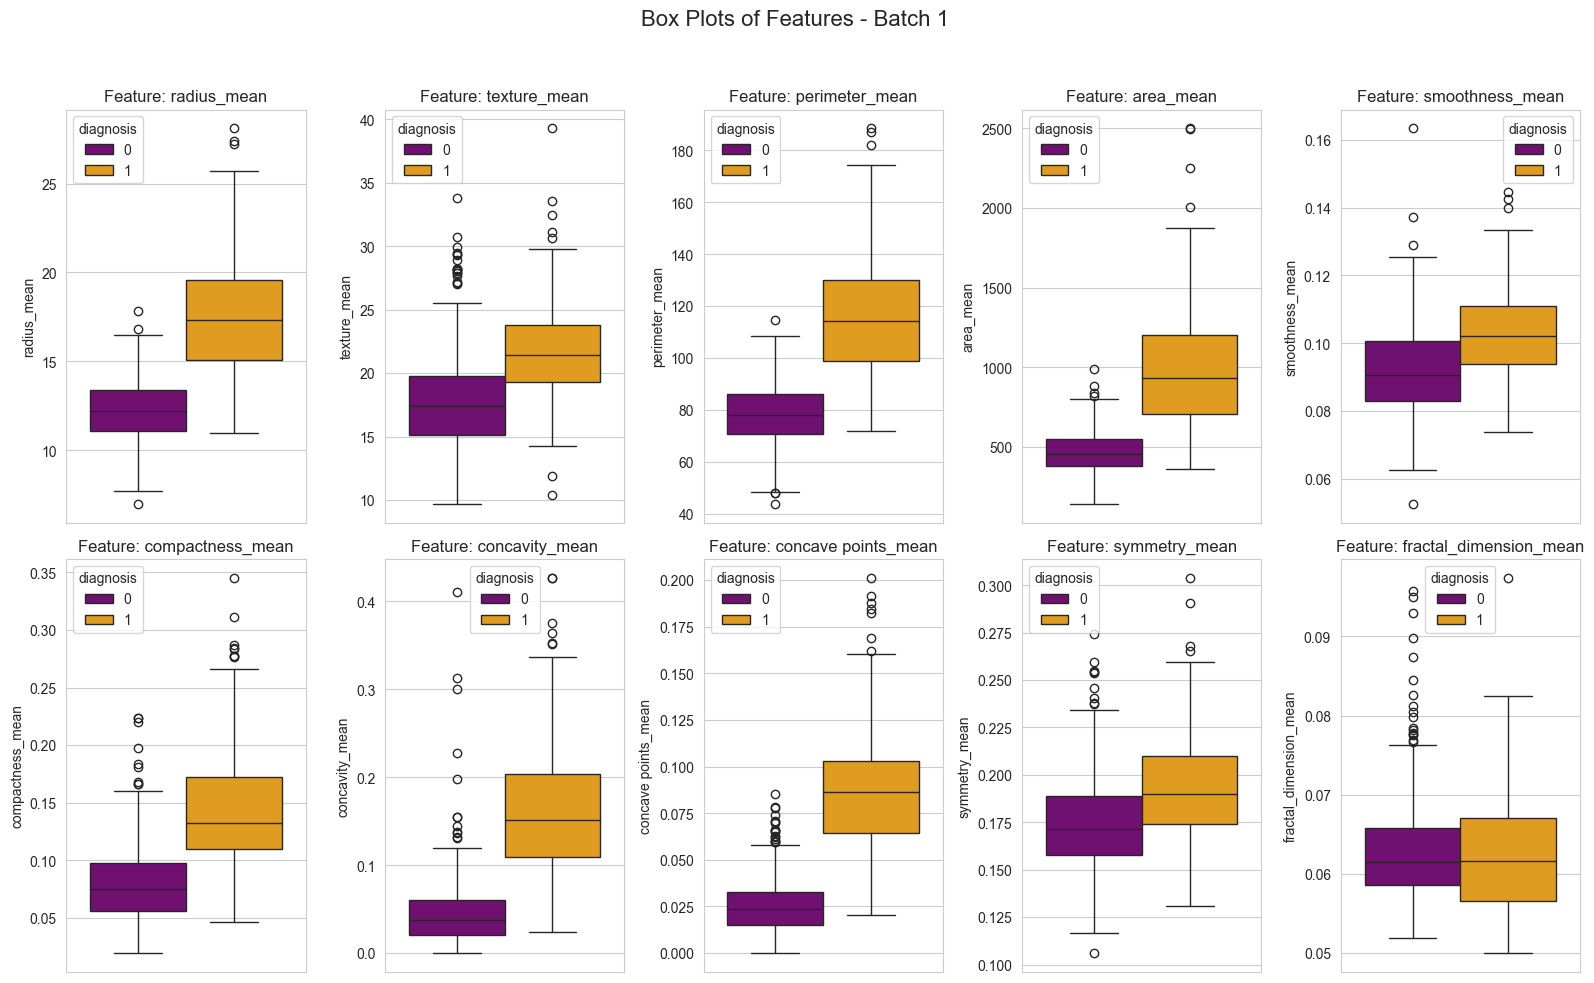

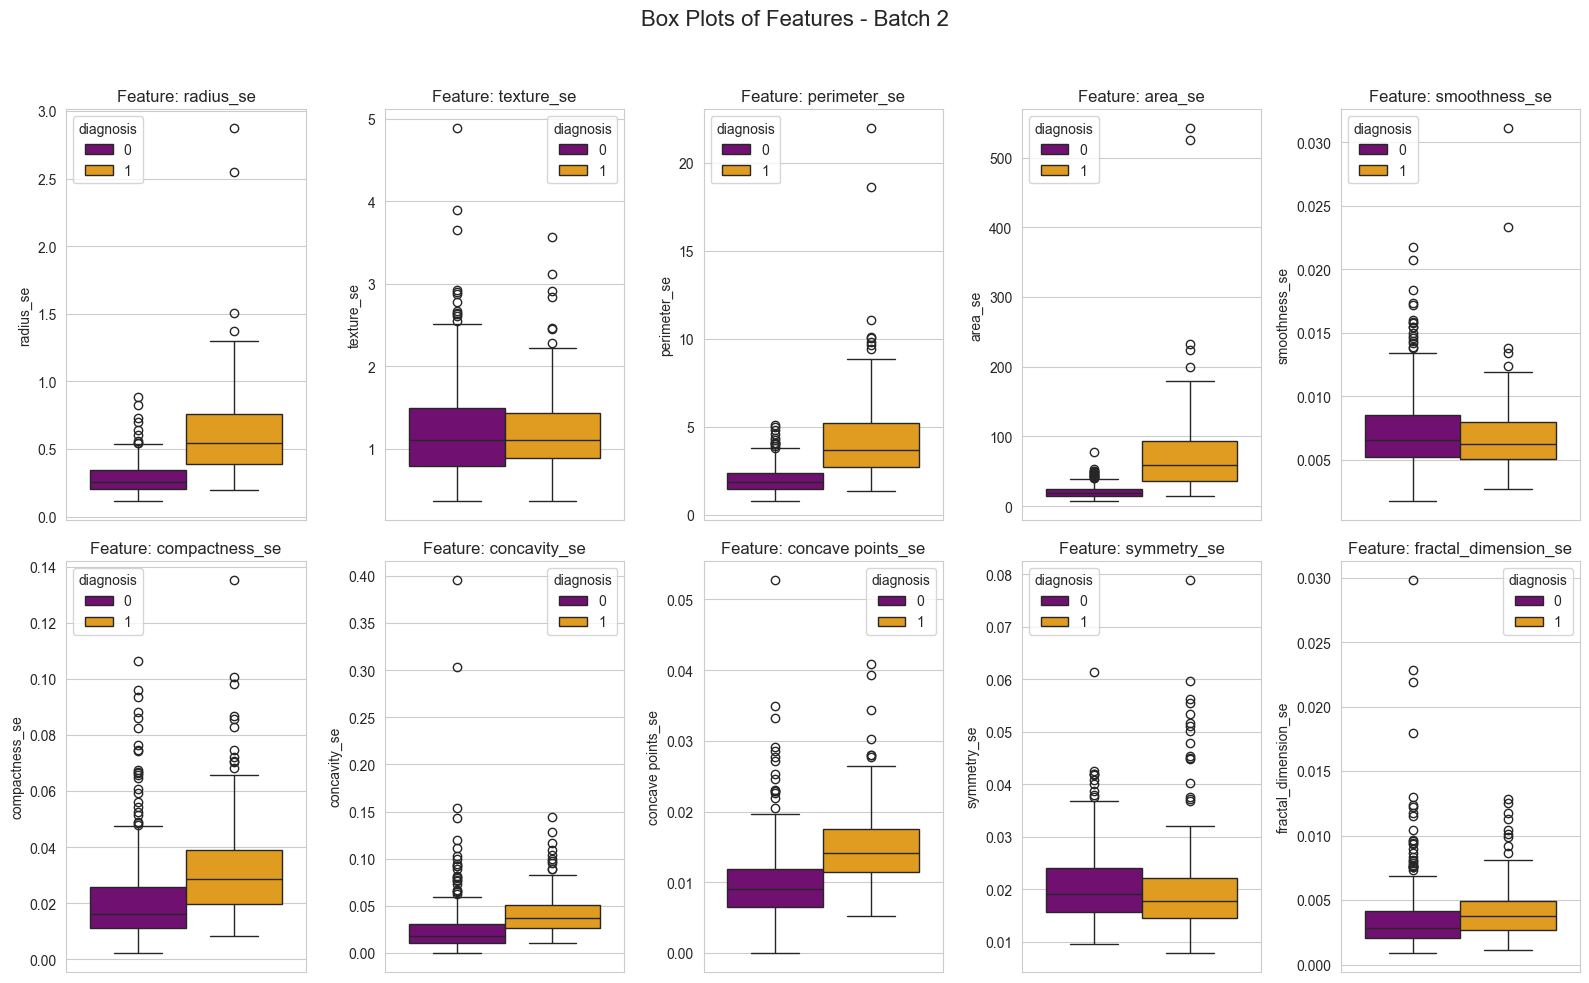

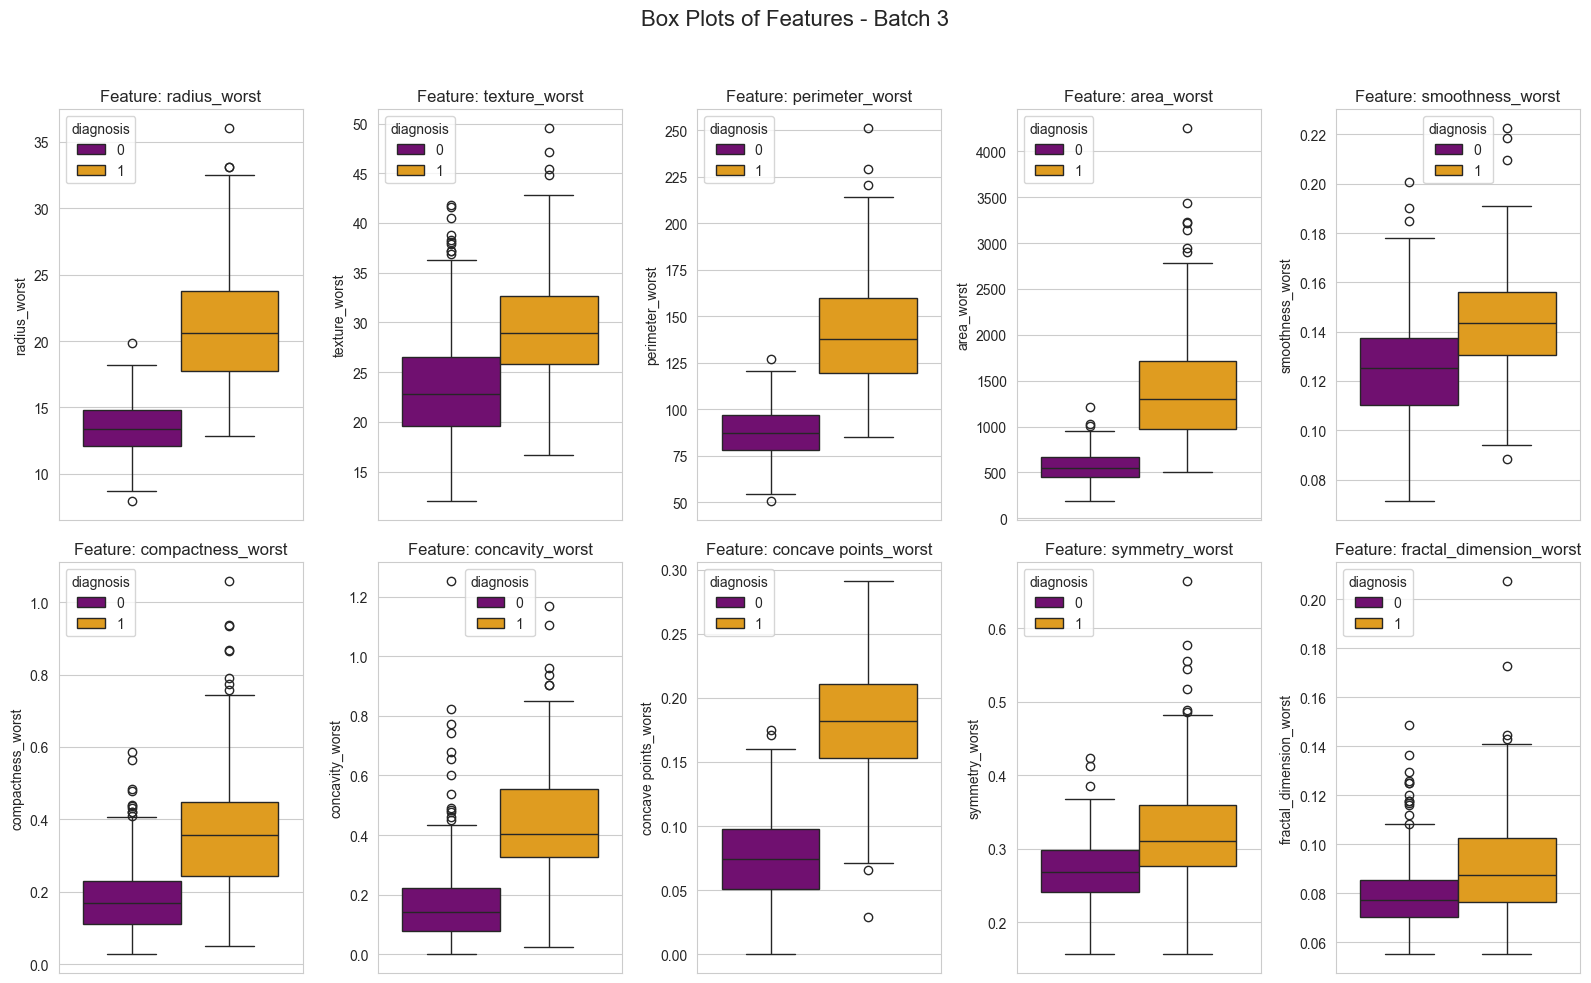

In [8]:
# batches of ten features
feature_batches = [
    ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
     'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
    ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
     'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'],
    ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
     'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
]

custom_palette = {'purple', 'orange'}

for batch_num, batch in enumerate(feature_batches, start=1):
    plt.figure(figsize=(16, 10))
    for i, feature in enumerate(batch, 1):
        plt.subplot(2, 5, i)
        sns.boxplot(data=df, y=feature, hue='diagnosis', palette=custom_palette, dodge=True)
        plt.title(f'Feature: {feature}', fontsize=12)
    plt.suptitle(f'Box Plots of Features - Batch {batch_num}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


<Axes: >

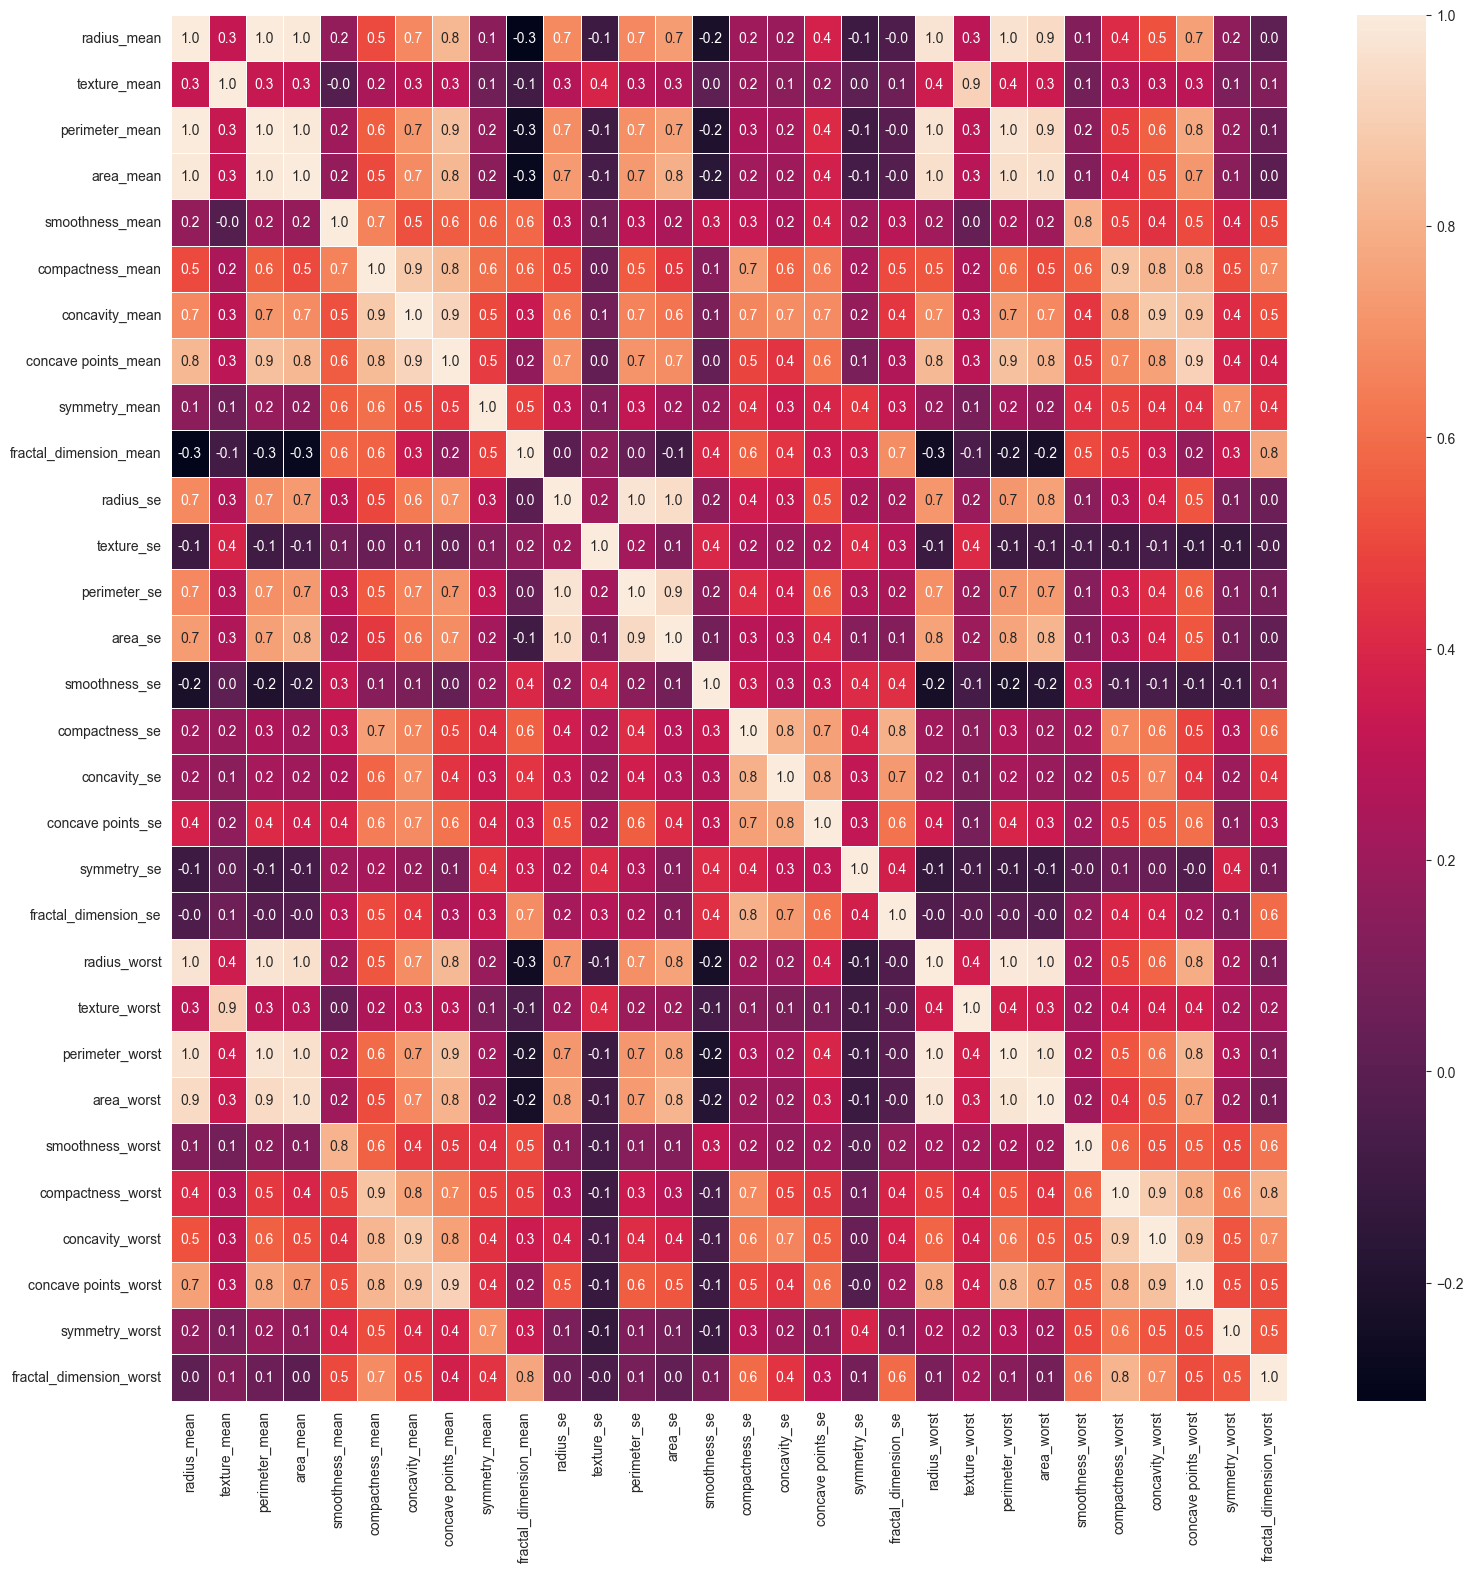

In [9]:
# correlation matrix heatmap seaborn

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
# Can eliminate features with high correlation, we need to justify these briefly in report!!!

eliminated = ['perimeter_mean','radius_mean','area_se','fractal_dimension_worst','compactness_mean','concave points_mean','radius_se','perimeter_se','concavity_worst','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_new = x.drop(eliminated,axis = 1 )
x_new.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364


<Axes: >

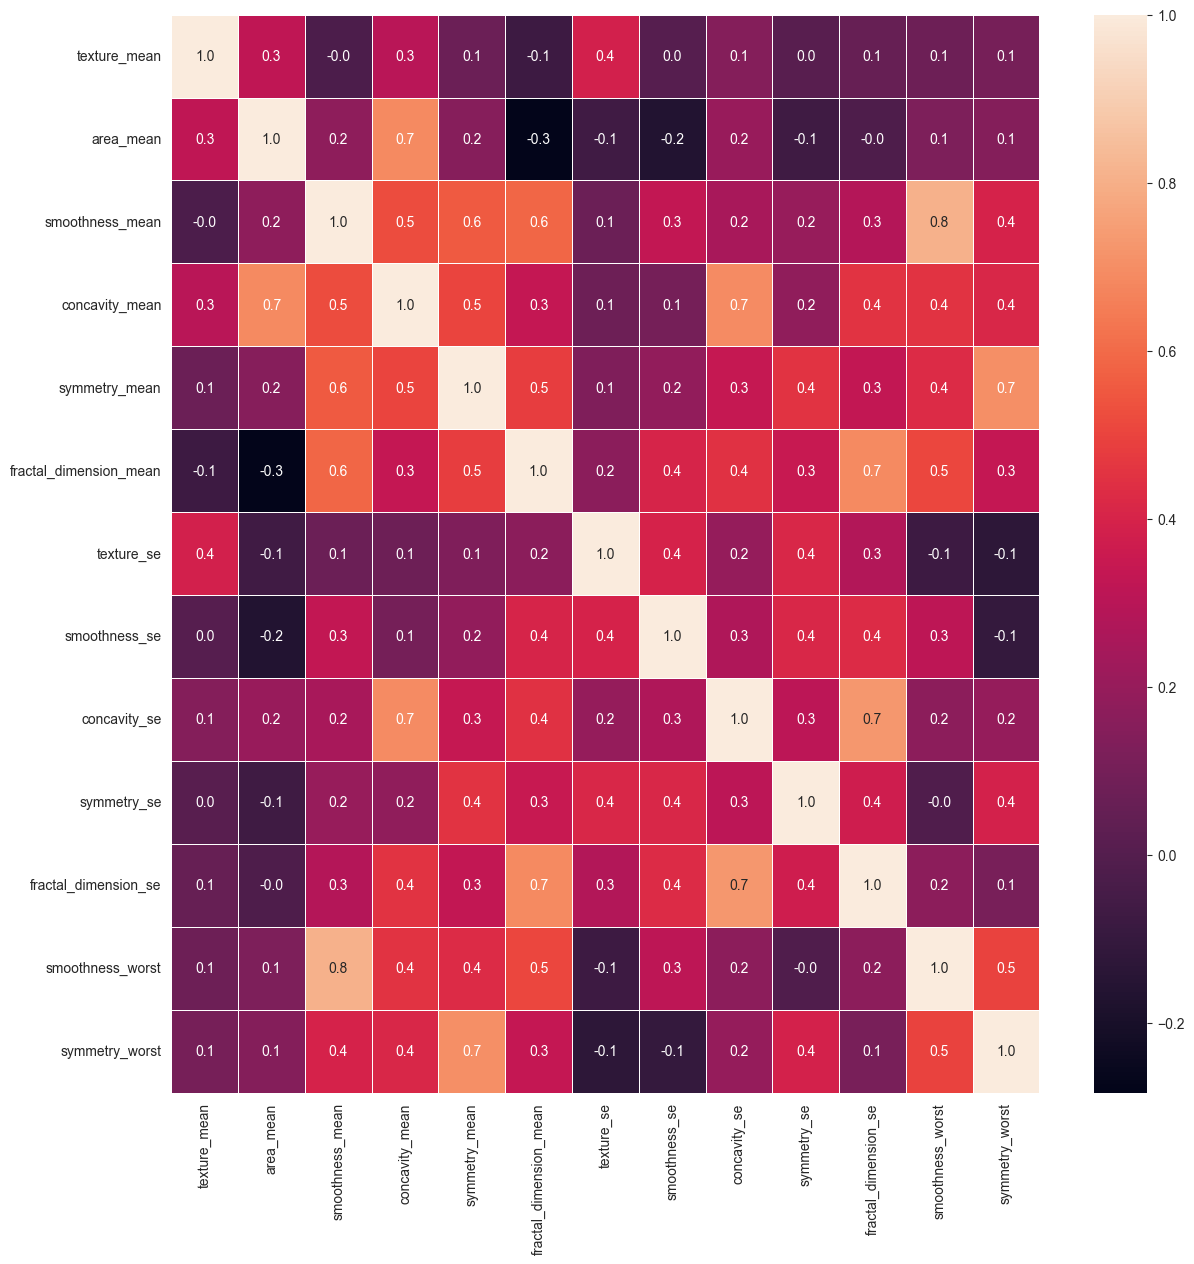

In [11]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [12]:


# Make standardization
scaler = StandardScaler()
x_new = scaler.fit_transform(x_new)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

log_reg = LogisticRegression()

accuracies = cross_val_score(log_reg, x_train, y_train, cv=kf, scoring='accuracy')

print(f'K-Fold Cross-Validation Accuracies on Training Set: {accuracies}')
print(f'Average Cross-Validation Accuracy on Training Set: {accuracies.mean():.3f}')

log_reg.fit(x_train, y_train)

y_pred_test = log_reg.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Test Set Accuracy: {test_accuracy:.3f}')

K-Fold Cross-Validation Accuracies on Training Set: [0.9125     1.         0.9625     0.98734177 0.97468354]
Average Cross-Validation Accuracy on Training Set: 0.967
Test Set Accuracy: 0.965


In [13]:
# Precision, Recall, F1 Score

print(classification_report(y_test, log_reg.predict(x_test), digits=3))


              precision    recall  f1-score   support

           0      0.990     0.954     0.972       108
           1      0.925     0.984     0.954        63

    accuracy                          0.965       171
   macro avg      0.958     0.969     0.963       171
weighted avg      0.966     0.965     0.965       171



K-Fold Cross-Validation Accuracies on Training Set: [0.9        0.975      0.95       0.96202532 0.98734177]
Average Cross-Validation Accuracy on Training Set: 0.955
Accuracy of Random Forest classifier on test set: 0.959


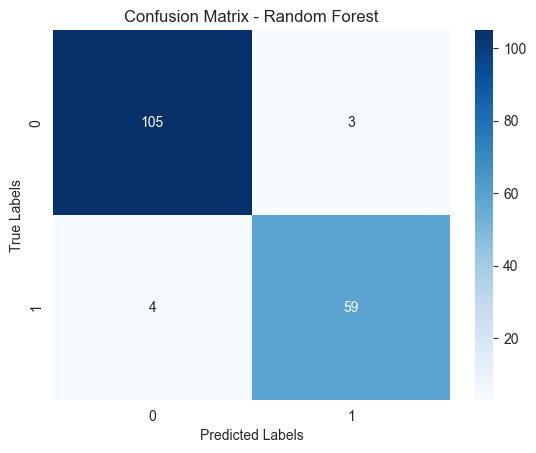

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

rf_cv_accuracies = cross_val_score(rf, x_train, y_train, cv=kf, scoring='accuracy')

print(f'K-Fold Cross-Validation Accuracies on Training Set: {rf_cv_accuracies}')
print(f'Average Cross-Validation Accuracy on Training Set: {rf_cv_accuracies.mean():.3f}')

rf.fit(x_train, y_train)

test_accuracy = rf.score(x_test, y_test)
print(f'Accuracy of Random Forest classifier on test set: {test_accuracy:.3f}')

conf_matrix = confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
# Recall, Precision, F1 Score

print(classification_report(y_test, rf.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.963     0.972     0.968       108
           1      0.952     0.937     0.944        63

    accuracy                          0.959       171
   macro avg      0.957     0.954     0.956       171
weighted avg      0.959     0.959     0.959       171

